<a href="https://colab.research.google.com/github/Achyuta-Harshavardhan/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import tensorflow as tf
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Deep Learning/Dataset/Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
# Create dummy variables
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
# Concatenate the Data Frames
x = pd.concat([x,geography,gender],axis=1)

In [ ]:
# Drop Unnecessary columns
x = x.drop(['Geography','Gender'],axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(6,activation='relu',kernel_initializer='he_uniform',input_dim=11))
model.add(Dense(6,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
# Compiling the ANN
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history = model.fit(x_train,y_train,batch_size=10,epochs=100,validation_split=0.3)

Epoch 1/100
560/560 [==============================] - 1s 3ms/step - loss: 0.5407 - accuracy: 0.7755 - val_loss: 0.4657 - val_accuracy: 0.7958
Epoch 2/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4450 - accuracy: 0.7964 - val_loss: 0.4413 - val_accuracy: 0.7937
Epoch 3/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4310 - accuracy: 0.8046 - val_loss: 0.4346 - val_accuracy: 0.8029
Epoch 4/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8066 - val_loss: 0.4304 - val_accuracy: 0.8100
Epoch 5/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4186 - accuracy: 0.8123 - val_loss: 0.4252 - val_accuracy: 0.8129
Epoch 6/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8161 - val_loss: 0.4216 - val_accuracy: 0.8138
Epoch 7/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4068 - accuracy: 0.8191 - val_loss: 0.4162 - val_accuracy: 0.8183

In [ ]:
# Making the predictions and evaluating the model
y_pred = model.predict(x_test)
y_pred = y_pred>0.5

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[1520,   75],
       [ 199,  206]])

In [ ]:
acc = accuracy_score(y_test,y_pred)
acc

0.863

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


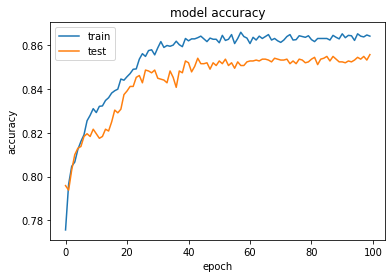

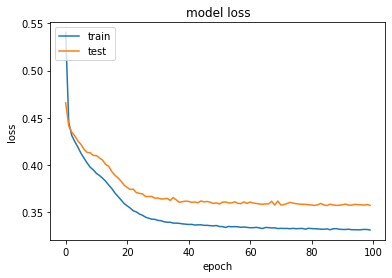

In [ ]:
from matplotlib import pyplot as plt
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()